# $Ti_2AlC$ DFT 计算验证


## 1. Convergence Test


### 1.1 ecutwfc convergence test (only valid for pw basis)


In [ ]:
from convergence_test import ABACUSConvergenceTest

conv_test = ABACUSConvergenceTest()
conv_test.ecut_run(ecut_min=50, ecut_max=130, ecut_interval=10)
conv_test.ecut_postprocessing()
conv_test.ecut_generate_plot(n_atoms=8)

### 1.2 kspacing convergence test



Starting kspacing test from 0.05 to 0.2 1/Bohr with interval 0.01 1/Bohr
Using the existing 'kpointtest_dir'

Testing kspacing (16 points)
-> Skipping kspacing = 0.05 1/Bohr (already computed)
-> Skipping kspacing = 0.06 1/Bohr (already computed)
-> Skipping kspacing = 0.07 1/Bohr (already computed)
-> Skipping kspacing = 0.08 1/Bohr (already computed)
-> Skipping kspacing = 0.09 1/Bohr (already computed)
-> Skipping kspacing = 0.1 1/Bohr (already computed)
-> Skipping kspacing = 0.11 1/Bohr (already computed)
-> Skipping kspacing = 0.12 1/Bohr (already computed)
-> Skipping kspacing = 0.13 1/Bohr (already computed)
-> Skipping kspacing = 0.14 1/Bohr (already computed)
-> Skipping kspacing = 0.15 1/Bohr (already computed)
-> Skipping kspacing = 0.16 1/Bohr (already computed)
-> Skipping kspacing = 0.17 1/Bohr (already computed)
-> Skipping kspacing = 0.18 1/Bohr (already computed)
-> Skipping kspacing = 0.19 1/Bohr (already computed)
-> Skipping kspacing = 0.2 1/Bohr (already computed

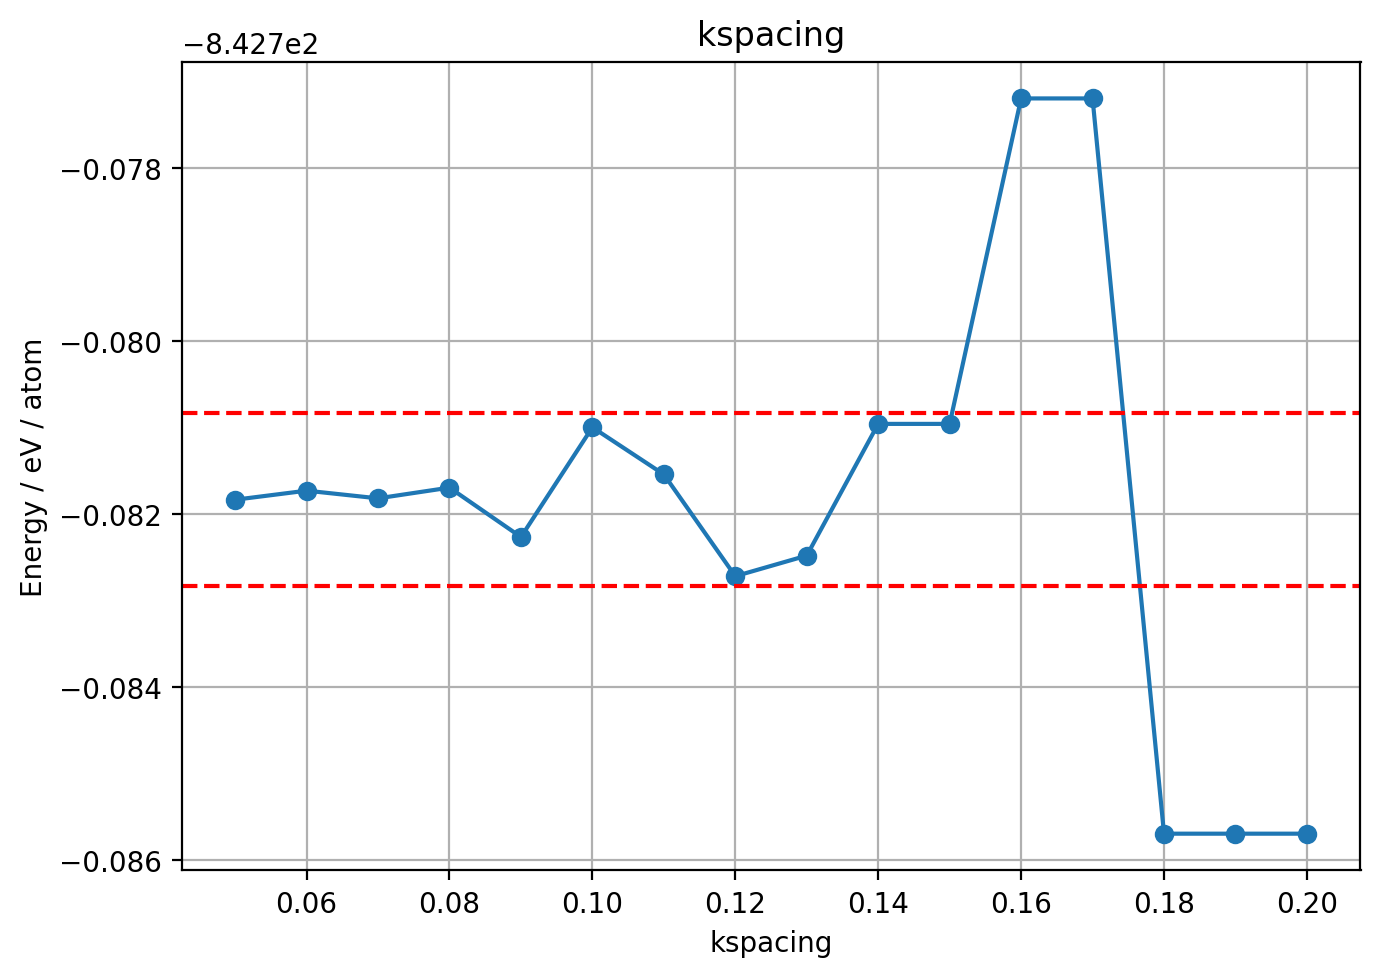

In [1]:
from convergence_test import ABACUSConvergenceTest
%config InlineBackend.figure_format = 'retina'

conv_test = ABACUSConvergenceTest(abacus_prefix="OMP_NUM_THREADS=16")
conv_test.kpoint_run(kspacing_min=0.05, kspacing_max=0.20, kspacing_interval=0.01)
conv_test.kpoint_postprocessing()
conv_test.kpoint_generate_plot(n_atoms=8)

### 1.3 kspacing convergence test (x, y, z)


In [ ]:
from convergence_test import ABACUSConvergenceTest
%config InlineBackend.figure_format = 'retina'

conv_test = ABACUSConvergenceTest()
conv_test.kpoint_xyz_run(kspacing_min_xyz=[0.05, 0.05, 0.05], kspacing_max_xyz=[0.20, 0.05, 0.20], kspacing_interval_xyz=0.02)
conv_test.kpoint_xyz_postprocessing()
conv_test.kpoint_xyz_generate_plot(n_atoms=8)

## 2. Cell-relax


In [ ]:
# install ase-abacus first
! pip install git+https://gitlab.com/1041176461/ase-abacus.git
! pip install dpdata pymatgen nglview

- 使用 ASE 计算初始（原）晶格常数以及体积


In [ ]:
from ase.io import read
from pathlib import Path

cs_dir = "cell-relax"

cs_stru_original = Path(cs_dir, "STRU")
cs_atoms_original = read(cs_stru_original, format="abacus")

lattice_params_original = cs_atoms_original.cell.cellpar()
volume_original = cs_atoms_original.cell.volume

# format: [len(a), len(b), len(c), angle(b,c), angle(a,c), angle(a,b)]
print("Original lattice_params: ", lattice_params_original)
print("Original volume: ", volume_original)

In [ ]:
from ase.io import read
from pathlib import Path
from ase.visualize import view

cs_dir = "cell-relax"

cs_stru_original = Path(cs_dir, "STRU")
cs_atoms_original = read(cs_stru_original, format="abacus")
view(cs_atoms_original, viewer='ngl')

### 2.1 PW


- 使用如下命令运行 Abacus 进行松弛


In [ ]:
! cd cell-relax && cp INPUT_pw INPUT && abacus

- 使用 ASE 计算晶格常数以及晶胞体积


In [ ]:
from ase.io import read
from pathlib import Path

cs_dir = "cell-relax"

cs_stru_relaxed = Path(cs_dir, "OUT.ABACUS", "STRU_ION_D")
cs_atoms_relaxed = read(cs_stru_relaxed, format="abacus")

lattice_params_relaxed = cs_atoms_relaxed.cell.cellpar()
volume_relaxed = cs_atoms_relaxed.cell.volume

# format: [len(a), len(b), len(c), angle(b,c), angle(a,c), angle(a,b)]
print("Relaxed lattice_params: ", lattice_params_relaxed)
print("Relaxed volume: ", volume_relaxed)

### 2.2 LCAO


- 使用如下命令运行 Abacus 进行松弛


In [ ]:
! cd cell-relax && cp INPUT_lcao INPUT && abacus

- 使用 ASE 计算晶格常数以及晶胞体积


In [6]:
from ase.io import read
from pathlib import Path

cs_dir = "cell-relax"

cs_stru_relaxed = Path(cs_dir, "OUT.ABACUS", "STRU_ION_D")
cs_atoms_relaxed = read(cs_stru_relaxed, format="abacus")

lattice_params_relaxed = cs_atoms_relaxed.cell.cellpar()
volume_relaxed = cs_atoms_relaxed.cell.volume

# format: [len(a), len(b), len(c), angle(b,c), angle(a,c), angle(a,b)]
print("Relaxed lattice_params: ", lattice_params_relaxed)
print("Relaxed volume: ", volume_relaxed)

Relaxed lattice_params:  [  3.06920572   3.06920572  13.7002102   90.          90.
 120.        ]
Relaxed volume:  111.7660391187175


- 理论计算与实验对比


[1] B. Manoun, F. X. Zhang, S. K. Saxena, T. El-Raghy, and M. W. Barsoum, “X-ray high-pressure study of Ti2AlN and Ti2AlC,” Journal of Physics and Chemistry of Solids, vol. 67, no. 9–10, pp. 2091–2094, Sep. 2006, doi: 10.1016/j.jpcs.2006.05.051.


| 参数                 | 文献实验值    | 计算结果 (LCAO) | 相对误差 (LCAO) | 计算结果 (PW) | 相对误差 (PW) | 计算结果 (D3_BJ) | 计算结果 (D3_0) | 计算结果 (D2) |
| :------------------- | :------------ | :-------------- | :-------------- | :------------ | :------------ | :--------------- | :-------------- | :------------ |
| **晶格常数 a (Å)**   | 3.065 ± 0.004 | 3.068           | +0.10%          | 3.067         | +0.07%        | 3.032            | 3.040           | 3.069         |
| **晶格常数 c (Å)**   | 13.71 ± 0.03  | 13.750          | +0.29%          | 13.739        | +0.21%        | 13.575           | 13.578          | 13.700        |
| **晶胞体积 V₀ (Å³)** | 111.6 ± 0.6   | 112.07          | +0.42%          | 111.92        | +0.29%        | 108.06           | 108.65          | 111.77        |


## 3. Elastic Constants


### 3.1 Introduction


#### 3.1.1. 核心概念：什么是弹性常数？

**弹性 (Elasticity)** 是固体材料在外力作用下发生形变，当外力撤去后能恢复其原始形状和尺寸的物理性质。

在线弹性范围内，材料的 **应力 (Stress, $\sigma$)** 与 **应变 (Strain, $\epsilon$)** 之间遵循胡克定律 (Hooke's Law)，即两者成正比线性关系。

- **应力 $\sigma$**：描述材料内部单位面积上所受的力，反映了内力的强度。单位通常是帕斯卡 (Pa) 或吉帕斯卡 (GPa)。
- **应变 $\epsilon$**：描述材料的相对形变程度，是一个无量纲的量（或表示为百分比）。

**弹性常数 (Elastic Constant, $C$)** 正是这个线性关系中的比例系数，它**定量地衡量了材料抵抗弹性形变的能力**。其物理意义可以理解为材料的“刚度”或“硬度”。

> **一句话总结：弹性常数越大，使材料发生单位形变所需要的力就越大，材料也就越“硬”。**


#### 3.1.2. 弹性常数的表示

##### 第一步：理解“阶” (Rank) - 从简单到复杂

我们可以把“张量”看作是描述物理量的一种数学工具，它的“阶”决定了它的复杂程度。

- **零阶张量 (Scalar)**：就是一个**单独的数**，没有方向。

  - **例子**：温度、质量。比如房间温度是 25°C，一个数字就说清楚了。

- **一阶张量 (Vector)**：就是一个**矢量**，既有大小又有方向。在三维空间中，我们需要用 **3 个数**来完整描述它。

  - **例子**：力、速度。比如一个力 $\vec{F}$，我们可以分解为它在 x, y, z 三个方向上的分量 $(F_x, F_y, F_z)$。它有一个下标，所以是“一阶”。

- **二阶张量 (Matrix)**：你可以把它想象成一个**矩阵**。它描述的是一个方向上的输入和另一个方向上的输出之间的关系。在三维空间中，它是一个 **3x3 的矩阵**，所以有 $3 \times 3 = 9$ 个分量。
  - **例子**：应力 ($\sigma$) 和应变 ($\epsilon$)。

##### 第二步：为什么应力($\sigma$)和应变($\epsilon$)是“二阶”的？

让我们以“应力”为例，它比“力”要复杂。

想象在材料内部有一个极小的正方体。

1.  我们先关注一个面，比如**垂直于 x 轴的面**（我们称之为 x-面）。
2.  作用在这个 x-面上的力，本身就是一个矢量，它可以有三个方向的分量：

    - 一个**垂直**于该面的力 (正应力)，方向在 x 轴上，记为 $\sigma_{xx}$。
    - 两个**平行**于该面的力 (剪应力)，方向分别在 y 和 z 轴上，记为 $\sigma_{xy}$ 和 $\sigma_{xz}$。

    你看，为了描述**一个面**上的受力情况，我们就需要 3 个数。

3.  现在，这个小方块有 3 个主要的面（x-面, y-面, z-面）。每个面都需要 3 个数来描述其受力。
4.  所以，总共就需要 $3 \times 3 = 9$ 个数，才能完整描述这个点上各个方向的受力状态。

这 9 个数可以排列成一个 3x3 的矩阵：

$$
\boldsymbol{\sigma} = \begin{pmatrix} \sigma_{xx} & \sigma_{xy} & \sigma_{xz} \\ \sigma_{yx} & \sigma_{yy} & \sigma_{yz} \\ \sigma_{zx} & \sigma_{zy} & \sigma_{zz} \end{pmatrix}
$$

这个矩阵就是**二阶应力张量**。它有两个下标（$ij$ in $\sigma_{ij}$），第一个下标 $i$ 代表“哪个面”，第二个下标 $j$ 代表“力的方向”。应变张量 $\boldsymbol{\epsilon}$ 也是完全一样的道理。

> **小结**：应力和应变之所以是二阶张量（9 个分量），是因为它们需要同时描述“作用面”和“作用力/形变”两个方向的信息。

##### **第三步：为什么弹性常数($C_{ijkl}$)是“四阶”的？**

现在到了最关键的一步。我们知道胡克定律是 `应力 = 弹性常数 × 应变`。

我们已经清楚了：

- **应力** $\sigma_{ij}$ 是一个有 9 个分量的矩阵。
- **应变** $\epsilon_{kl}$ 也是一个有 9 个分量的矩阵。

**弹性常数 $C$ 的作用，就是建立这两个矩阵之间每一个分量的联系**。它是一个“转换器”，输入一个应变矩阵，输出一个应力矩阵。

让我们想一下这个“转换器”需要多少个零件：

1.  我们想求出应力矩阵中的**一个分量**，比如 $\sigma_{xx}$。
2.  $\sigma_{xx}$ 的大小，可能**同时受到所有 9 种应变分量** ($\epsilon_{xx}, \epsilon_{xy}, \epsilon_{xz}, \epsilon_{yx}, \dots, \epsilon_{zz}$) 的影响。
3.  所以，为了计算 $\sigma_{xx}$，我们需要 9 个系数，分别对应它和 9 个应变分量的关系：

    $$
    \sigma_{xx} = C_{xxxx}\epsilon_{xx} + C_{xxxy}\epsilon_{xy} + C_{xxxz}\epsilon_{xz} + \dots (\text{共9项})
    $$

4.  仅仅为了得到应力矩阵的**一个**分量 $\sigma_{xx}$，我们就需要 9 个弹性常数分量 ($C_{xxkl}$)。

5.  而应力矩阵本身有 9 个分量 ($\sigma_{xx}, \sigma_{xy}, \dots, \sigma_{zz}$)。

6.  因此，要描述所有应力分量和所有应变分量之间的完整关系，总共需要的零件（弹性常数的分量）数量就是：
    $$
    (\text{应力分量的数量}) \times (\text{应变分量的数量}) = 9 \times 9 = 81 \text{ 个}
    $$

这个需要 81 个分量来描述的“超级转换器”，就是一个**四阶张量**。它有四个下标 $C_{ijkl}$，因为每个下标都可以在 x, y, z 三个方向中取值，所以总数是 $3 \times 3 \times 3 \times 3 = 3^4 = 81$。


#### 3.1.3. 数学描述：从张量到 Voigt 矩阵

在三维空间中，应力和应变都是二阶对称张量，有 9 个分量。因此，描述它们之间完整关系的弹性常数是一个复杂的四阶张量 $C_{ijkl}$，包含 $3 \times 3 \times 3 \times 3 = 81$ 个分量。

$$\sigma_{ij} = \sum_{k,l} C_{ijkl} \epsilon_{kl} \quad (i, j, k, l = x, y, z)$$

幸运的是，由于应力张量 ($\sigma_{ij} = \sigma_{ji}$) 和应变张量 ($\epsilon_{kl} = \epsilon_{lk}$) 的对称性，以及能量守恒所要求的 $C_{ijkl} = C_{klij}$，独立的弹性常数分量远少于 81 个。

为了简化表示，我们引入 **Voigt 表示法 (Voigt Notation)**，将二阶张量“压缩”成一个 6 分量的矢量。

- **Voigt 映射规则**:

  - 拉伸/压缩分量: $xx \to 1$, $yy \to 2$, $zz \to 3$
  - 剪切分量: $yz \to 4$, $xz \to 5$, $xy \to 6$

- **应力与应变矢量**:
  - $\sigma = [\sigma_1, \sigma_2, \sigma_3, \sigma_4, \sigma_5, \sigma_6]^T$
  - $\epsilon = [\epsilon_1, \epsilon_2, \epsilon_3, \epsilon_4, \epsilon_5, \epsilon_6]^T$

经过 Voigt 变换后，四阶弹性张量 $C_{ijkl}$ 就简化为了一个 **6x6 的对称矩阵 $C_{ij}$**，胡克定律也相应写为更直观的矩阵形式：

$$
\begin{bmatrix} \sigma_1 \\ \sigma_2 \\ \sigma_3 \\ \sigma_4 \\ \sigma_5 \\ \sigma_6 \end{bmatrix}
=
\begin{bmatrix}
 C_{11} & C_{12} & C_{13} & C_{14} & C_{15} & C_{16} \\
 C_{12} & C_{22} & C_{23} & C_{24} & C_{25} & C_{26} \\
 C_{13} & C_{23} & C_{33} & C_{34} & C_{35} & C_{36} \\
 C_{14} & C_{24} & C_{34} & C_{44} & C_{45} & C_{46} \\
 C_{15} & C_{25} & C_{35} & C_{45} & C_{55} & C_{56} \\
 C_{16} & C_{26} & C_{36} & C_{46} & C_{56} & C_{66}
\end{bmatrix}
\begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \epsilon_3 \\ 2\epsilon_4 \\ 2\epsilon_5 \\ 2\epsilon_6 \end{bmatrix}
$$

**注意**: 在工程定义中，剪切应变分量前有一个因子 2，这是为了保持能量表达式形式的一致性。

晶体的对称性会进一步减少独立弹性常数的数量。例如，对于立方晶体，只有 $C_{11}$, $C_{12}$, $C_{44}$ 三个是独立的。


#### 3.1.4. Abacus 计算流程：理论推导与实践步骤

##### **核心理论：求解线性方程组**

计算弹性常数的本质，是求解胡克定律的矩阵形式 $\boldsymbol{\sigma} = \mathbf{C} \boldsymbol{\varepsilon}$。在这个方程中：

- 应变矩阵 $\boldsymbol{\varepsilon}$ 是我们施加的**已知输入**。
- 应力矩阵 $\boldsymbol{\sigma}$ 是我们通过 DFT 计算得到的**测量结果**。
- 6x6 的弹性常数矩阵 $\mathbf{C}$ 是我们要求解的**未知量**。

我们的整个计算流程，就是一套设计精良的数值实验，旨在生成足够的线性方程组来精确地解出矩阵 $\mathbf{C}$ 的所有独立分量。

##### **步骤 1：获得理想的基态结构 (理论推导与结构弛豫)**

- **理论推导**
  胡克定律描述的是**应力变化量**与应变的关系，其更严谨的形式是 $\Delta\boldsymbol{\sigma} = \mathbf{C} \boldsymbol{\varepsilon}$，其中 $\Delta\boldsymbol{\sigma} = \boldsymbol{\sigma}_{\text{strained}} - \boldsymbol{\sigma}_0$。$\boldsymbol{\sigma}_0$ 是初始平衡态的参考应力。

  为了能将方程简化为 $\boldsymbol{\sigma} \approx \mathbf{C} \boldsymbol{\varepsilon}$，我们必须确保参考应力 $\boldsymbol{\sigma}_0$ 无限趋近于零。任何显著的残余应力 $\boldsymbol{\sigma}_0$ 都会成为整个计算的系统误差来源。

  在 DFT 中，一个体系的总能量 $E$ 是其原子坐标 $\{R_i\}$ 和晶格矢量 $\mathbf{A}$ 的函数。应力张量的定义是总能量对微小应变的偏导数：
  $$ \sigma*{ij} = \frac{1}{V} \frac{\partial E(\boldsymbol{\varepsilon}, \{R_i\})}{\partial \epsilon*{ij}} $$
  因此，获得零应力状态，等价于寻找一个能量对所有应变分量的偏导数都为零的结构，即找到体系的能量最低点。

- **实践步骤**
  1.  运行一次完整的几何优化（`calculation = 'cell-relax'`）。
  2.  此过程会同时调整晶胞参数和原子坐标，以寻找体系总能量的最小值，最终得到一个理论上应力为零的基态结构。
  3.  该结构的几何信息被保存在 `STRU_ION_D` 文件中，作为后续所有计算的“零点”参考。同时，需要记录下此时微小的残余应力值，用于最终结果的修正。

##### **步骤 2：施加受控应变 (理论推导与构型生成)**

- **理论推导**
  为了求解 $\mathbf{C}$ 矩阵，我们需要通过施加特定的应变来解耦方程。策略是**一次只激活一个应变分量**，从而孤立出 $\mathbf{C}$ 矩阵的一整列。

  以施加第一种应变模式为例，我们让 $\epsilon_1 \neq 0$，而所有其他的 $\epsilon_i (i=2 \dots 6) = 0$。此时，矩阵方程 $\boldsymbol{\sigma} = \mathbf{C} \boldsymbol{\varepsilon}$ 展开后变为：

  $$
  \begin{bmatrix} \sigma_1 \\ \sigma_2 \\ \sigma_3 \\ \sigma_4 \\ \sigma_5 \\ \sigma_6 \end{bmatrix}
  =
  \begin{bmatrix}
  C_{11} & C_{12} & \dots & C_{16} \\
  C_{21} & C_{22} & \dots & C_{26} \\
  \vdots & \vdots & \ddots & \vdots \\
  C_{61} & C_{62} & \dots & C_{66}
  \end{bmatrix}
  \begin{bmatrix} \epsilon_1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}
  $$

  进行矩阵乘法后，我们得到一组非常简单的线性关系：

  $$
  \sigma_1 = C_{11}\epsilon_1 \quad \Rightarrow \quad C_{11} = \sigma_1 / \epsilon_1 \\
  \sigma_2 = C_{21}\epsilon_1 \quad \Rightarrow \quad C_{21} = \sigma_2 / \epsilon_1 \\
  \vdots \\
  \sigma_6 = C_{61}\epsilon_1 \quad \Rightarrow \quad C_{61} = \sigma_6 / \epsilon_1
  $$

  这清晰地表明：通过施加一个纯 $\epsilon_1$ 应变并测量由此产生的整个应力张量 $\boldsymbol{\sigma}$，我们就可以直接确定弹性矩阵 $\mathbf{C}$ 的**第一列**所有元素。

  同理，通过依次施加 6 种独立的应变模式，我们便能确定 $\mathbf{C}$ 矩阵的全部 6 列。而对每种模式施加多个不同的应变大小（例如 ±0.005, ±0.01），是为了通过多次测量进行线性拟合，以消除数值噪音，并验证计算是否在我们假设的线性弹性区内。

- **实践步骤**
  运行脚本将上述理论过程自动化，对基态结构 `STRU_ION_D` 施加 6 种模式 × 4 种大小的应变，生成 24 个包含变形后结构 (`STRU`) 的任务文件夹。

##### **步骤 3：计算应力响应 (理论推导与应力计算)**

- **理论推导**
  当我们对晶胞施加一个应变（即固定了晶格矢量）时，内部的原子会受到力的作用，不再处于平衡位置。此时计算出的瞬时应力并不代表材料在该应变下的真实响应。

  物理上，材料的应力响应应该是在**给定宏观应变下，内部结构达到新的平衡（即原子受力为零）时**的状态。这意味着，在保持晶胞形状和体积不变的前提下，我们需要让原子沿着受力方向移动，直到体系能量达到该约束下的局部最小值。这个过程被称为**离子弛豫 (Ionic Relaxation)**。

  因此，正确的做法是，对于每一个变形后的构型，都进行一次**固定晶胞、只允许原子移动**的能量最小化计算。计算收敛后得到的应力，才是与该宏观应变相对应的、物理意义正确的应力。

- **实践步骤**
  1.  在 24 个 `task.XXX` 文件夹中分别运行 `abacus`。
  2.  `INPUT` 文件中的 `calculation = 'relax'` 指示 ABACUS 进行能量最小化。由于 `STRU` 文件中的晶格矢量是固定的，程序默认不会改变晶胞，从而完美地实现了“固定晶胞、弛豫原子”这一理论要求。

##### **步骤 4：线性拟合求解 (理论推导与数据分析)**

- **理论推导**
  经过步骤 3，我们为每种应变模式都获得了一系列数据点。以模式 1 为例，我们有 4 组数据点 $(\epsilon_{1}^{(k)}, \sigma_{j}^{(k)})$，其中 $k=1,2,3,4$。

  我们的目标是求解方程 $\sigma_j = C_{j1}\epsilon_1$ 中的斜率 $C_{j1}$。由于数值误差的存在，这些点不会完美地落在一条直线上。因此，我们需要使用**线性回归**（具体为**最小二乘法**）来找到最佳拟合直线。

  最小二乘法旨在找到一个斜率 $C_{j1}$，使得所有测量点与拟合直线之间的误差平方和最小：
  $$ \text{Minimize} \sum*{k=1}^{4} \left( \sigma_j^{(k)} - C*{j1}\epsilon*1^{(k)} \right)^2 $$
    该优化问题的解析解为：
    $$ C*{j1} = \frac{\sum*{k} \sigma_j^{(k)}\epsilon_1^{(k)}}{\sum*{k} (\epsilon_1^{(k)})^2} $$
  通过这个公式，我们可以从带有噪音的数据中稳健地提取出最可信的斜率值，即弹性常数。

- **实践步骤**
  1.  运行脚本将上述最小二乘法拟合过程自动化。它会读取所有任务文件夹中的应变和应力数据，对 6 种模式进行拟合，计算出所有 $C_{ij}$ 分量，并将最终的 6x6 矩阵输出。
  2.  最后，脚本还会利用得到的 $C_{ij}$ 矩阵，通过标准的 Voigt-Reuss-Hill 平均公式，计算出杨氏模量、剪切模量等工程参数。


#### 3.1.5. 总结与要点

1.  **物理基础**: 弹性常数是胡克定律在线弹性范围内的比例系数，表征材料的刚度。
2.  **数学工具**: 利用 Voigt 表示法，将复杂的四阶张量 $C_{ijkl}$ 简化为易于处理的 6x6 对称矩阵 $C_{ij}$。
3.  **计算核心**: 通过**应力-应变法**，对完美平衡结构施加一系列微小应变，计算其应力响应，然后通过线性拟合求解 $C_{ij}$。
4.  **ABACUS 流程**:
    - **Relax** 获得基态结构。
    - **Apply Strains**: 自动产生 6 种模式 x 4 种大小 = 24 个变形构型。
    - **Calculate Stresses**: 对 24 个构型进行固定晶胞的原子弛豫，得到应力。
    - **Linear Fit**: 对数据进行线性回归，从斜率中提取出所有 $C_{ij}$。
5.  **应用价值**: 计算出的弹性常数可用于检验材料的**力学稳定性** (Born-Huang 判据)，并可换算为杨氏模量、剪切模量、体积模量等工程参数，是材料计算设计中的重要环节。


### 3.2 宏观弹性模量与各向异性参数解析

#### 3.2.1 体积模量 (Bulk Modulus, B or K)

**体积模量**衡量的是材料**抵抗均匀压缩、保持其体积不变**的能力。它反映了原子间结合力的强度。

- **物理意义**：想象一下将一块材料浸入深海，水从四面八方均匀地施加压力。体积模量就描述了在这种均匀压力下，材料体积收缩的难易程度。
- **参考范围**：
  - **硬质材料 (如陶瓷、金刚石)**: 通常具有非常高的体积模量，典型值在 **200 GPa 以上**，金刚石可达 440 GPa。
  - **金属 (如钢、铝)**: 体积模量较高，通常在 **70 - 200 GPa** 的范围内。
  - **软材料 (如聚合物)**: 体积模量很低，通常**低于 10 GPa**。


#### 3.2.2 剪切模量 (Shear Modulus, G)

**剪切模量**也称为刚度模量 (Rigidity Modulus)，衡量的是材料**抵抗形状改变、保持其形状不变**的能力。

- **物理意义**：想象一下将一本厚书或一副扑克牌平放在桌上，手掌按住封面水平推动。书会发生倾斜的形变，但其体积基本不变。剪切模量就是描述这种抵抗“剪切”或“扭转”形变能力的物理量。
- **参考范围**：
  - **硬质材料 (如陶瓷、硬质合金)**: 具有很高的剪切模量，通常在 **100 - 200 GPa** 范围。
  - **普通金属**: 剪切模量较高，通常在 **25 - 80 GPa** 范围，例如钢约为 80 GPa。
  - **软材料**: 剪切模量非常低，通常远**低于 5 GPa**。


#### 3.2.3 Voigt, Reuss, Voigt-Reuss-Hill (VRH) 平均

第一性原理计算出的 $C_{ij}$ 是针对**完美单晶**的，其性质具有方向性。然而，我们日常接触的材料大多是**多晶体**。Voigt、Reuss 和 Hill 提出了三种从单晶数据估算多晶体宏观性质的近似模型。

- **Voigt (福伊特) 平均**: 假设所有晶粒的**应变 (Strain) 均一**。这通常会**高估**真实的弹性模量，给出一个**理论上限**。
- **Reuss (罗伊斯) 平均**: 假设所有晶粒的**应力 (Stress) 均一**。这通常会**低估**真实的弹性模量，给出一个**理论下限**。
- **Voigt-Reuss-Hill (VRH) 平均**: 这是最常用、最被广泛接受的近似，它直接取 Voigt 上限和 Reuss 下限的**算术平均值**，被认为是理论上最接近实际情况的值。
  > $B_{VRH} = (B_{Voigt} + B_{Reuss}) / 2$ > $G_{VRH} = (G_{Voigt} + G_{Reuss}) / 2$


#### 3.2.4 泊松比 (Poisson's Ratio, ν)

**泊松比**描述了材料在单向拉伸或压缩时，其**横向形变与纵向形变之比**。它反映了材料在拉伸时横向收缩的趋势。

- **物理意义**：当你拉伸一根橡皮筋时，它不仅会变长（纵向形变），同时也会变细（横向形变）。泊松比就是 “变细的程度” / “变长的程度” 的比值。
- **参考范围**：
  - **橡胶类材料**: 接近 **0.5**，表示形变时体积几乎不变。
  - **大多数金属**: 在 **0.25 - 0.35** 之间，例如钢约为 0.3。
  - **陶瓷等脆性材料**: 泊松比较低，通常在 **0.1 - 0.25** 之间。
  - **特殊材料 (拉胀材料)**: 泊松比可以为负值。


#### 3.2.5 普适各向异性指数 (Universal Anisotropy Index, $A^U$)

这是一个综合性的指标，用**一个单独的数字**来量化晶体**弹性的各向异性程度**。

- **物理意义**：它衡量了材料的弹性性质（如杨氏模量）是否随方向变化，以及变化的剧烈程度。
- **解读**:
  - **$A^U$ = 0**: 表示材料是**完全各向同性 (Isotropic)** 的，其弹性在所有方向上都完全相同。
  - **$A^U$ > 0**: 表示材料是**各向异性 (Anisotropic)** 的。这个数值**越大**，说明其弹性性质的方向依赖性越强，材料在不同方向上的“硬度”差异越大。常见金属的 $A^U$ 值可以从接近 0 到几甚至十几。


#### 3.2.6 杨氏模量 (Young's Modulus, E)

**杨氏模量**可能是最广为人知的力学参数，它衡量的是材料在**单向拉伸或压缩**时抵抗弹性形变的能力，常被直接称为“弹性模量”或“刚度”。

- **物理意义**：想象一下拉伸一根金属丝，杨氏模量描述了需要多大的力才能使其伸长一定的长度。它是应力-应变曲线初始线性阶段的斜率。
- **与其他模量的关系**：它不是一个独立的量，可以由体积模量(B)和剪切模量(G)计算得出：$E = \frac{9BG}{3B+G}$。
- **参考范围**：
  - **高刚度材料 (如陶瓷, 钨)**: 杨氏模量非常高，通常 > 200 GPa。
  - **金属 (如钢, 钛)**: 杨氏模量较高，范围多在 100 - 200 GPa。
  - **聚合物 (如塑料)**: 杨氏模量很低，通常 < 10 GPa。


#### 3.2.7 普氏比 (Pugh's Ratio, B/G)

**普氏比**即体积模量与剪切模量之比，它是一个被广泛应用的、判断材料**韧性 (Ductility) 与脆性 (Brittleness)** 的经验判据。

- **物理意义**：它比较了材料抵抗体积改变和抵抗形状改变的能力。一个易于改变形状（低 G）但难以被压缩（高 B）的材料，倾向于通过塑性形变来耗散能量，表现为韧性。
- **经验判据**：
  - **B/G > 1.75**: 材料倾向于表现为**韧性**。原子倾向于通过滑移等方式重新排列（塑性形变），而不是直接断裂。大多数金属都属于这一类。
  - **B/G < 1.75**: 材料倾向于表现为**脆性**。当受力时，材料更倾向于键的断裂而不是形状的改变。大多数陶瓷属于这一类。
  - 这个 **1.75** 的临界值是由 S. F. Pugh 在 1954 年凭经验提出的。


#### 3.2.8 拉梅第一参数 (Lamé's First Parameter, λ)

**拉梅参数**是线性弹性理论中的两个基本常数，通常记为 $\lambda$ 和 $\mu$。我们已经熟悉的**剪切模量 G 就是拉梅第二参数 $\mu$**。

- **物理意义**：与杨氏模量或剪切模量相比，$\lambda$ 没有一个特别直观的、可以单独拎出来的物理场景。它更多地是作为一个数学参数出现在弹性力学的本构方程中，用来关联应力与应变。
- **与其他模量的关系**：它可以由体积模量和剪切模量导出：$\lambda = B - \frac{2}{3}G$。在描述弹性行为时，使用 $(\lambda, G)$ 组合与使用 $(B, G)$ 或 $(E, \nu)$ 组合是等价的。


#### 3.2.9 维氏硬度 (Vickers Hardness, Hv) 的经验估算

**硬度**衡量的是材料抵抗**局部塑性形变**（如刮擦或压痕）的能力。它不是一个纯粹的弹性参数，但可以通过弹性模量进行经验性的估算。

- **物理意义**：它反映了材料表面的耐磨损和抗压痕能力。
- **经验估算模型**：有多种基于 B 和 G 估算 $H_v$ 的模型，例如 Chen 等人提出的一个常用模型：
  > $H_v (\text{GPa}) \approx 2(k^2G)^{0.585} - 3$, 其中 $k = G/B$。
- **重要提示**：必须强调，这只是一个**经验公式**，其结果是一个理论预测值，用于趋势分析和高通量筛选，可能与实验测量的精确值存在差异。
- **参考范围**：
  - **软金属 (如铝)**: $H_v$ 通常在 1 GPa 以下。
  - **硬质合金与钢**: $H_v$ 通常在 5 - 20 GPa。
  - **超硬陶瓷 (如金刚石, c-BN)**: $H_v$ 可高达 40 - 100 GPa。


### 3.3 Calculation


#### 3.3.1 生成应变构型


- 首先进行 Cell-relax


In [ ]:
! cd cell-relax && cp INPUT_pw INPUT && abacus

- 使用脚本生成应变构型


In [ ]:
from elastic_calc import ElasticCalculator

# cp from cell-relax to elastic-calc
elastic_calc = ElasticCalculator(relax_dir="cell-relax_3x3x3", dfm_dir="elastic-calc_3x3x3")
elastic_calc.gen_dfm()

In [ ]:
! cd elastic-calc && chmod 755 ./elastic_run_relax.sh && ./elastic_run_relax.sh

#### 3.3.2 使用 pymatgen 拟合弹性常数


In [10]:
from elastic_calc import ElasticCalculator

elastic_calc = ElasticCalculator(dfm_dir="elastic-calc_3x3x3")
elastic_calc.compute_elastic()

# Elastic Constants in GPa
 310.08   59.83   59.35    0.00    0.00    0.00 
  59.58  310.45   59.32    0.00    0.00    0.00 
  61.36   61.36  270.90    0.00    0.00    0.00 
  -0.00   -0.00   -0.00  111.34    0.00    0.00 
  -0.00   -0.00   -0.00    0.00  111.30    0.00 
   0.65   -0.43   -0.13    0.00    0.00  121.42 
# Bulk   Modulus BV = 139.14 GPa
# Shear  Modulus GV = 116.34 GPa
# Youngs Modulus EV = 272.95 GPa
# Poission Ratio uV = 0.17 


#### 3.3.3 对比


- 理论计算与实验数据对比


[1] M. Radovic et al., “On the elastic properties and mechanical damping of Ti3SiC2, Ti3GeC2, Ti3Si0.5Al0.5C2 and Ti2AlC in the 300–1573K temperature range,” Acta Materialia, vol. 54, no. 10, pp. 2757–2767, Jun. 2006, doi: 10.1016/j.actamat.2006.02.019.


| 物理量                              | 文献实验值 (RUS) | 计算结果 (LCAO) | 相对误差 (LCAO) | 计算结果 (PW) | 相对误差 (PW) | 计算结果 (LCAO 3x3x3) |
| :---------------------------------- | :--------------- | :-------------- | :-------------- | :------------ | :------------ | :-------------------- |
| **体积模量 (Bulk Modulus, GPa)**    | 139.6 ± 0.3      | 138.91          | -0.5%           | 137.21        | -1.7%         | 139.14                |
| **剪切模量 (Shear Modulus, GPa)**   | 118.8 ± 0.3      | 116.44          | -2.0%           | 115.99        | -2.4%         | 116.34                |
| **杨氏模量 (Young's Modulus, GPa)** | 277.6 ± 0.7      | 273.03          | -1.6%           | 271.48        | -2.2%         | 272.95                |
| **泊松比 (Poisson's Ratio)**        | 0.169 ± 0.0004   | 0.17            | +0.6%           | 0.17          | +0.6%         | 0.17                  |


## 4. 超胞


### 4.1 构造超胞并 Relax


#### 4.1.1 扩胞并添加 D3 修正


- 使用如下命令进行扩胞


    3x3x3


In [ ]:
# NOTE: only run once
# import os
# from pathlib import Path
# from ase.io import read, write
# from ase.visualize import view

# cs_dir = Path("cell-relax")
# cs_dir_3x3x3 = Path("cell-relax_3x3x3")
# os.system(f"cp -r {cs_dir} {cs_dir_3x3x3}")

# cs_vasp = Path(cs_dir_3x3x3, "Ti2AlC_mp-12990_conventional_standard.cif")
# cs_atoms_original = read(cs_vasp, format="cif")
# # view(cs_atoms_original, viewer="ngl")

# # expand the cell to 3*3*3
# cs_atoms_3x3x3 = cs_atoms_original.repeat((3, 3, 3))
# pp = {"Ti": "Ti_ONCV_PBE-1.2.upf", "Al": "Al.upf", "C": "C.upf"}
# basis = {"Ti": "Ti_gga_7au_100Ry_4s2p2d1f.orb", "Al": "Al_gga_8au_100Ry_2s2p1d.orb", "C": "C_gga_8au_100Ry_2s2p1d.orb"}
# write(Path(cs_dir_3x3x3, "STRU"), cs_atoms_3x3x3, format="abacus", pp=pp, basis=basis)
# view(cs_atoms_3x3x3, viewer="ngl")
# os.system("rm ase_sort.dat")

    2x2x2


In [ ]:
# import os
# from pathlib import Path
# from ase.io import read, write
# from ase.visualize import view

# cs_dir = Path("cell-relax")
# cs_dir_2x2x2 = Path("cell-relax_2x2x2")
# os.system(f"cp -r {cs_dir} {cs_dir_2x2x2}")

# cs_vasp = Path(cs_dir_2x2x2, "Ti2AlC_mp-12990_conventional_standard.cif")
# cs_atoms_original = read(cs_vasp, format="cif")
# # view(cs_atoms_original, viewer="ngl")

# # expand the cell to 2*2*2
# cs_atoms_2x2x2 = cs_atoms_original.repeat((2, 2, 2))
# pp = {"Ti": "Ti_ONCV_PBE-1.2.upf", "Al": "Al.upf", "C": "C.upf"}
# basis = {"Ti": "Ti_gga_7au_100Ry_4s2p2d1f.orb", "Al": "Al_gga_8au_100Ry_2s2p1d.orb", "C": "C_gga_8au_100Ry_2s2p1d.orb"}
# write(Path(cs_dir_2x2x2, "STRU"), cs_atoms_2x2x2, format="abacus", pp=pp, basis=basis)
# view(cs_atoms_2x2x2, viewer="ngl")
# os.system("rm ase_sort.dat")

    2x2x3


In [ ]:
# import os
# from pathlib import Path
# from ase.io import read, write
# from ase.visualize import view

# cs_dir = Path("cell-relax")
# cs_dir_2x2x3 = Path("cell-relax_2x2x3")
# os.system(f"cp -r {cs_dir} {cs_dir_2x2x3}")

# cs_vasp = Path(cs_dir_2x2x3, "Ti2AlC_mp-12990_conventional_standard.cif")
# cs_atoms_original = read(cs_vasp, format="cif")
# # view(cs_atoms_original, viewer="ngl")

# # expand the cell to 2*2*3
# cs_atoms_2x2x3 = cs_atoms_original.repeat((2, 2, 3))
# pp = {"Ti": "Ti_ONCV_PBE-1.2.upf", "Al": "Al.upf", "C": "C.upf"}
# basis = {"Ti": "Ti_gga_7au_100Ry_4s2p2d1f.orb", "Al": "Al_gga_8au_100Ry_2s2p1d.orb", "C": "C_gga_8au_100Ry_2s2p1d.orb"}
# write(Path(cs_dir_2x2x3, "STRU"), cs_atoms_2x2x3, format="abacus", pp=pp, basis=basis)
# view(cs_atoms_2x2x3, viewer="ngl")
# os.system("rm ase_sort.dat")

- INPUT 中添加 D3 修正


- 进行 Cell-Relax


#### 4.1.2 PW


In [ ]:
! source $HOME/Software/abacus-develop/toolchain/abacus_env.sh && cd cell-relax_2x2x2 && cp INPUT_pw INPUT && abacus

#### 4.1.3 LCAO


In [ ]:
! source $HOME/Software/abacus-develop/toolchain/abacus_env.sh && cd cell-relax_2x2x2 && cp INPUT_lcao INPUT && mpirun --use-hwthread-cpus -np 16 abacus

- 使用 ASE 计算晶格常数以及晶胞体积


In [7]:
from ase.io import read
from pathlib import Path

cs_dir = "cell-relax_2x2x2"

cs_stru_relaxed = Path(cs_dir, "OUT.ABACUS", "STRU_ION_D")
cs_atoms_relaxed = read(cs_stru_relaxed, format="abacus")

lattice_params_relaxed = cs_atoms_relaxed.cell.cellpar()
volume_relaxed = cs_atoms_relaxed.cell.volume

# format: [len(a), len(b), len(c), angle(b,c), angle(a,c), angle(a,b)]
print(f"Relaxed lattice_params:   (a) {lattice_params_relaxed[0]/2:.3f} Å, (c) {lattice_params_relaxed[2]/2:.3f} Å")
print(f"Relaxed volume: {volume_relaxed/8:.3f} Å^3")

Relaxed lattice_params:   (a) 3.069 Å, (c) 13.703 Å
Relaxed volume: 111.757 Å^3


In [8]:
from ase.io import read
from pathlib import Path

cs_dir = "cell-relax_3x3x3"

cs_stru_relaxed = Path(cs_dir, "OUT.ABACUS", "STRU_ION_D")
cs_atoms_relaxed = read(cs_stru_relaxed, format="abacus")

lattice_params_relaxed = cs_atoms_relaxed.cell.cellpar()
volume_relaxed = cs_atoms_relaxed.cell.volume

# format: [len(a), len(b), len(c), angle(b,c), angle(a,c), angle(a,b)]
print(f"Relaxed lattice_params:   (a) {lattice_params_relaxed[0]/3:.3f} Å, (c) {lattice_params_relaxed[2]/3:.3f} Å")
print(f"Relaxed volume: {volume_relaxed/27:.3f} Å^3")

Relaxed lattice_params:   (a) 3.067 Å, (c) 13.753 Å
Relaxed volume: 112.068 Å^3


#### 4.1.4 结果对比


| 参数               | 文献实验值    | DFT (1x1x1 w/o vdW) | DFT (1x1x1 w/ vdW) | DFT (2x2x2 w/o vdW) | DFT (2x2x2 w/ vdW) | DFT (3x3x3 w/o vdW) |
| :----------------- | :------------ | :------------------ | :----------------- | :------------------ | :----------------- | :------------------ |
| **晶格常数 a (Å)** | 3.065 ± 0.004 | 3.068               | 3.032              | 3.068               | 3.032              | 3.067               |
| **晶格常数 c (Å)** | 13.71 ± 0.03  | 13.750              | 13.575             | 13.752              | 13.579             | 13.753              |
| **体积 V₀ (Å³)**   | 111.6 ± 0.6   | 112.07              | 108.06             | 112.06              | 108.11             | 112.7               |


### 4.2 VdW 修正必要性分析


在利用密度泛函理论（DFT）对 MAX 相材料进行计算模拟时，是否需要引入范德-华（van der Waals, vdW）力修正（如 Grimme 的 DFT-D3 方案）是一个复杂且重要的方法论问题。答案并非简单的“是”或“否”，而是高度依赖于研究的具体目标和物理体系。以下将从几个关键角度对此进行阐述。


#### 4.2.1 什么是 vdW-D3 修正？

标准的密度泛函理论近似，如广义梯度近似（GGA，以 PBE 泛函为代表），其理论构造基于电子密度的局域信息。这使得它们在描述由电子云重叠形成的短程化学键（如共价键、金属键）时非常成功，但在描述由非局域电子关联效应引起的长程范德华力（也称色散力）时则存在先天缺陷 [1]。

范德华力源于瞬时偶极矩之间的相互作用，普遍存在于所有物质中。为了弥补标准 DFT 的这一不足，德国化学家 Stefan Grimme 等人开发了一系列经验性色散校正方案，其中 DFT-D3 是目前应用最广泛和成熟的版本之一 [2]。

**D3 修正的核心思想**是在标准 DFT 计算出的总能量之上，额外添加一个半经验的色散能项 [2, 3]。该项主要由两部分构成：

- **原子对吸引能**：形式为$C_6/R^6$，描述了相距为$R$的两个原子间的吸引力。
- **阻尼函数**：在原子间距很近时，该函数会使色散能趋于零，以避免与标准 DFT 泛函计算的短程相互作用发生能量双重计算 [3]。

简而言之，DFT-D3 是一种计算成本极低且物理意义明确的“补丁”，它将长程色散力的贡献“添加”回标准 DFT 计算中，从而提供一个更完整的物理图像 [2]。


#### 4.2.2 为什么 MAX 相计算可能需要 D3 修正？

尽管 MAX 相是硬质陶瓷材料，但其独特的纳米层状结构使其在某些情况下必须考虑范德华力的影响。

- **论点一：能量差的精度要求**

  在计算化学中，许多结论依赖于对微小能量差的精确判断。例如，比较不同晶体结构（多晶型）的稳定性、计算固溶体的形成能、或确定缺陷的形成能等。这些能量差往往非常微小，可能只有几十 meV/原子的量级。

  一项针对氧化物多晶型稳定性的研究发现，D3 修正带来的能量变化量级恰好与不同多晶型之间的能量差相当 [4]。这意味着，**即使范德华力对总能量的贡献不大，它也足以改变不同相之间的能量排序，从而颠覆对材料基态和稳定性的预测** [4]。因此，当研究涉及这类高精度的能量比较时，引入 D3 修正就从一个“可选项”变成了确保结论可靠性的“必选项”。

- **论点二：研究方向决定方法**

  当研究体系从理想的块体（bulk）材料扩展到表面、界面、吸附或其衍生物（如 MXene）时，范德华力的重要性会急剧上升。

  - **表面与吸附**：分子在 MAX 相或 MXene 表面的吸附过程，其结合能中包含了显著的范德华力贡献。忽略它会导致对吸附行为的严重误判 [5]。
  - **MXene**：当 MAX 相被刻蚀成二维 MXene 后，层与层之间的作用力从金属键转变为范德华力。在这种情况下，不使用色散修正是完全错误的，无法描述其层间结合的物理本质。有研究明确指出，对于 MXene 体系，DFT-D3 比 DFT-D2 能更好地描述 vdW 修正 [6]。


#### 4.2.3 为什么 MAX 相计算有时又可以不用 D3 修正？

与上述情况相对，大量的 MAX 相计算研究确实没有使用 D3 修正，并且也得到了与实验吻合良好的结果。这背后的核心原因在于：

- **论点：强键主导机制**

  MAX 相的体材料性质主要由其内部强烈的化学键所决定。M-X 键（如 Ti-C）是强共价键和金属键的混合，而 M-A 键（如 Ti-Si）也是较强的金属键。这些强键的键能远大于范德华相互作用。因此，在描述由这些强键主导的**体材料宏观性质**（如晶格常数、弹性模量、内聚能）时，范德华力的贡献相对较小，其影响可能低于标准 GGA 泛函本身的内在误差。

  一篇综述文章明确指出，MAX 相中的成键太强，无法像石墨烯等范德华材料那样被轻易地机械剥离，这从物理上区分了两者 [7]。

- **直接证据：针对`Ti3SiC2`的测试**

  对于`Ti3SiC2`，有一项研究进行了非常直接的测试。研究人员在计算其弹性常数和基态能量时，明确对比了不加修正的 DFT 方法以及添加了 DFT-D2 和 DFT-D3 修正的方法。

  该研究得出的结论是：“**计算结果表明，（引入 D2 或 D3 修正后）仅出现了轻微的变化**” [8]。

  这一发现为“强键主导论”提供了最直接的证据。它表明，对于计算`Ti3SiC2`的体材料弹性性质这类问题，范德华力的影响确实微乎其微，标准的 GGA 泛函已经能够胜任。


#### 4.2.4 参考文献 (References)

[1] Cohen, A. J.; Mori-Sánchez, P.; Yang, W. Challenges for Density Functional Theory. _Chemical Reviews_ **2012**, _112_ (1), 289–320.

[2] Grimme, S.; Antony, J.; Ehrlich, S.; Krieg, H. A consistent and accurate ab initio parametrization of density functional dispersion correction (DFT-D) for the 94 elements H-Pu. _The Journal of Chemical Physics_ **2010**, _132_ (15), 154104.

[3] Grimme, S.; Ehrlich, S.; Goerigk, L. Effect of the Damping Function in Dispersion Corrected Density Functional Theory. _Journal of Computational Chemistry_ **2011**, _32_ (7), 1456–1465.

[4] Deredita, J. S.; Holder, A. M.; Pless, J. D.; et al. Influence of Dispersion Interactions on the Polymorphic Stability of Crystalline Oxides. _Journal of the American Chemical Society_ **2023**, _145_ (24), 13331–13341.

[5] Ghaffari, M.; Gholampour, N.; Hashemian, Z. A DFT study of Ti3C2 MXene nanosheets as a drug delivery system for 5-fluorouracil. _Journal of Molecular Modeling_ **2021**, _27_ (1), 26.

[6] Liu, G.; Kong, L.; Wang, S.; et al. Promoting Electrochemical Performance of Ti3C2O2 MXene-Based Electrodes of Alkali-Ion Batteries via S Doping: Theoretical Insight. _Frontiers in Chemistry_ **2021**, _9_, 773179.

[7] Ayodimeji, M.; Abioye, O. P.; Oloye, G. G.; Olubambi, P. A. On the formation mechanisms and properties of MAX phases: A review. _Journal of Materials Research and Technology_ **2021**, _11_, 1373-1392.

[8] Li, L.; Ma, Z.; Tian, W.; Sun, Z. Enabling the transition to ductile MAX phases and the exfoliation to MXenes via tuning the A element. _Materials Today Physics_ **2023**, _36_, 101150.


## 5. AIMD: 室温下的晶格常数


### 5.1 run


In [ ]:
! cd md_lattice && abacus

### 5.2 数据分析


In [1]:
import dpdata

# 使用 dpdata 加载系统
system = dpdata.LabeledSystem("./md_lattice/", fmt='abacus/md')

# --- 打印加载的基本信息 ---
print(f"成功加载系统！")
print(f"总帧数 (Number of frames): {len(system)}")
print(f"体系中的原子数 (Number of atoms): {system.get_natoms()}")

# --- 访问核心数据 ---
# dpdata 将数据存储在类似字典的结构中
# 原子类型名称 (ntypes,)
atom_names = system["atom_names"]
# 每种原子类型的原子数 (ntypes,)
atom_numbs = system["atom_numbs"]
num_atoms = system.get_natoms()
# 原子类型数组 (natoms,)
atom_types = system["atom_types"]
# 晶胞 (nframes, 3, 3)
cells = system["cells"]
# 坐标 (nframes, natoms, 3)
coords = system["coords"]
# 势能 (nframes,)，注意这是势能(Potential Energy)，不是总能
energies = system["energies"]
# 力 (nframes, natoms, 3)
forces = system["forces"]
# 维里张量 (nframes, 3, 3)
virials = system["virials"]

print(f"原子类型名称: {atom_names}")
print(f"每种原子类型的原子数: {atom_numbs}")
print(f"原子类型数组: {atom_types}")
print(f"坐标数组维度: {coords.shape}")
print(f"晶胞数组维度: {cells.shape}")
print(f"势能数组维度: {energies.shape}")

成功加载系统！
总帧数 (Number of frames): 928
体系中的原子数 (Number of atoms): 96
原子类型名称: ['Ti', 'Al', 'C']
每种原子类型的原子数: [48, 24, 24]
原子类型数组: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
坐标数组维度: (928, 96, 3)
晶胞数组维度: (928, 3, 3)
势能数组维度: (928,)


- 晶格常数


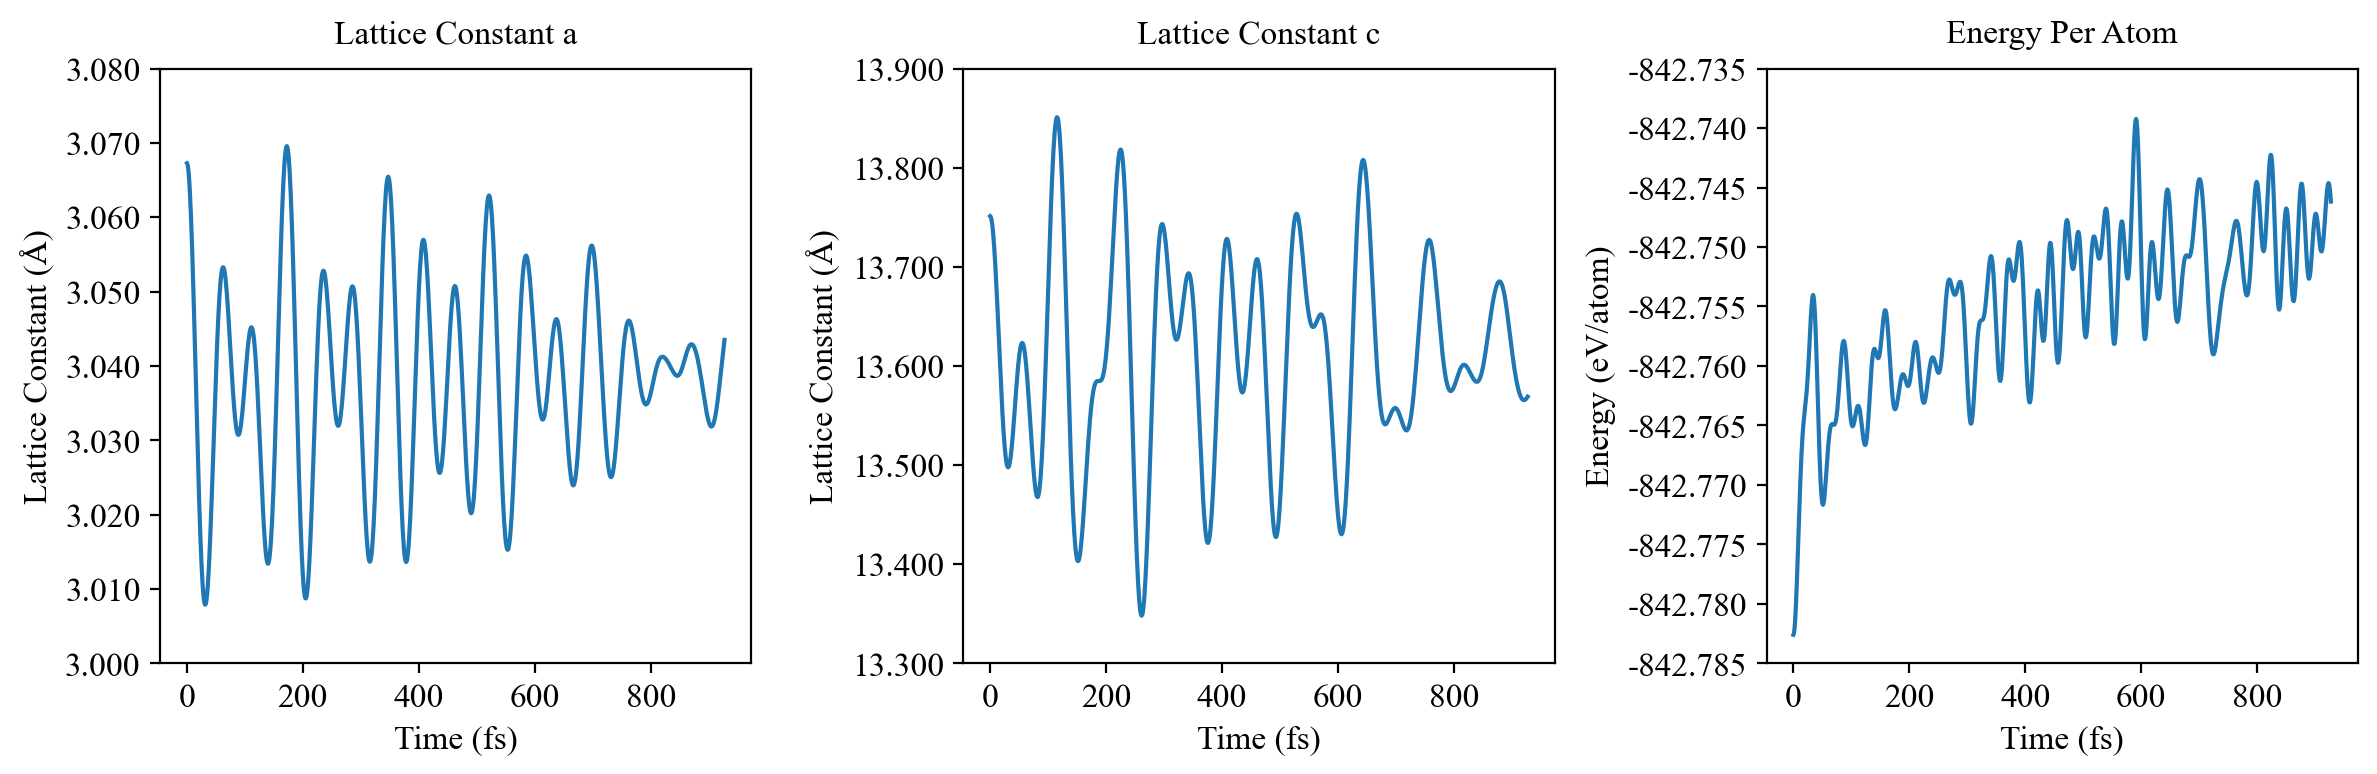

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from utils import PlotUtils

lattice_a = cells[:, 0, 0] / 2
lattice_c = cells[:, 2, 2] / 3
steps = np.arange(len(lattice_a))

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True)
fnt_family = "Times New Roman"
fnt_size = 12
%config InlineBackend.figure_format = 'retina'

axs[0].plot(steps, lattice_a, label="lattice_a")
axs[1].plot(steps, lattice_c, label="lattice_c")
axs[2].plot(steps, energies / num_atoms, label="energy")
axs[0].set_ylabel("Lattice Constant (Å)", x=1.3, fontfamily=fnt_family, fontsize=fnt_size)
axs[1].set_ylabel("Lattice Constant (Å)", x=1.3, fontfamily=fnt_family, fontsize=fnt_size)
axs[2].set_ylabel("Energy (eV/atom)", x=1.3, fontfamily=fnt_family, fontsize=fnt_size)
axs[0].set_title("Lattice Constant a", y=1.016, fontfamily=fnt_family, fontsize=fnt_size)
axs[1].set_title("Lattice Constant c", y=1.016, fontfamily=fnt_family, fontsize=fnt_size)
axs[2].set_title("Energy Per Atom", y=1.016, fontfamily=fnt_family, fontsize=fnt_size)

for i in range(3):
    # axs[i].legend(prop={'family': fnt_family}, fontsize=fnt_size - 3, frameon=False)
    axs[i].set_xlabel("Time (fs)", y=1.02, fontfamily=fnt_family, fontsize=fnt_size)
    axs[i].tick_params(axis="both", which="major", labelsize=fnt_size, labelfontfamily=fnt_family)
    axs[i].locator_params(axis="x", nbins=6)
    axs[i].locator_params(axis="y", nbins=10)
    PlotUtils.set_ytick(axs[i], width=3)

plt.tight_layout()
plt.savefig("./md_lattice/md_lattice_energy.png", dpi=300)
plt.show()

In [3]:
print(f"Mean Lattice Constant a: {np.mean(lattice_a)} Å")
print(f"Mean Lattice Constant c: {np.mean(lattice_c)} Å")
print(f"Mean Energy Per Atom: {np.mean(energies) / num_atoms} eV/atom")

Mean Lattice Constant a: 3.037990412992567 Å
Mean Lattice Constant c: 13.608732516862911 Å
Mean Energy Per Atom: -842.7549386067934 eV/atom


## 6. 缺陷形成能


### 6.1 MAX 相材料中的点缺陷及其重要性


#### 6.1.1 MAX 相：独特的纳米层状“金属陶瓷”

MAX 相是一类具有通式 Mn+1​AXn​（其中 n=1, 2, 3）的层状三元碳化物或氮化物材料，其中 M 代表早期过渡金属，A 为主族元素（通常是 IIIA 或 IVA 族），X 为碳或氮 [1]。这类材料因其独特的晶体结构和性能组合而备受关注。其晶体结构通常为六方晶系（空间群为 P6₃/mmc），其最显著的特征是纳米尺度的层状结构：由 M-X 原子间强共价键或离子键构成的“陶瓷”层（例如，在 Ti-Al-C 体系中，是由 Ti 和 C 原子组成的八面体层）与由 M-A 原子间相对较弱的金属键构成的“金属”层（例如，纯 Al 原子层）在原子尺度上交替堆叠而成 [2]。

这种独特的原子排列赋予了 MAX 相一系列兼具金属和陶瓷优点的卓越性能。与金属类似，它们通常表现出良好的导电性和导热性、优异的抗热震性和损伤容限，并且易于机械加工 [1]。与陶瓷类似，它们又具有较高的弹性模量、轻质以及在高温下的化学稳定性，特别是良好的抗氧化性 [1]。这种“金属陶瓷”的双重特性使其在航空航天、核能、高温涂层和电子触点等极端环境应用中展现出巨大的潜力。

[1] First-Principles Study of Vacancies in Ti3SiC2 and Ti3AlC2 - PMC, accessed June 20, 2025, https://pmc.ncbi.nlm.nih.gov/articles/PMC5459148/

[2] Phase stability of Ti2AlC upon oxygen incorporation: A first-principles investigation - DiVA portal, accessed June 20, 2025, https://www.diva-portal.org/smash/get/diva2:291770/FULLTEXT02.pdf


#### 6.1.2 点缺陷在 MAX 相中的关键作用

在任何实际的晶体材料中，缺陷的存在都是不可避免的，它们在很大程度上决定了材料的宏观性能。对于 MAX 相而言，点缺陷（point defects），如原子空位（vacancies）、间隙原子（interstitials）和反位缺陷（antisite defects），扮演着尤为关键的角色 [1]。这些原子尺度的不完美结构是调控 MAX 相材料性能的核心因素。

具体而言，点缺陷对 MAX 相性能的影响体现在以下几个方面：

- **力学性能**：点缺陷的存在会影响晶格的完整性和原子间的相互作用力，从而改变材料的硬度、延展性、弹性常数等基本力学参数。例如，通过引入替代原子形成固溶体，可以显著强化 Ti₂AlC 的硬度。
- **电学性能**：点缺陷可以作为载流子的散射中心或来源，直接影响材料的电导率。例如，在 Ti₂AlC 中，Ag 替代 Al 不仅改变了成键特性，还通过贡献 Ag 4d 轨道电子态密度显著提高了材料的电导率。
- **化学稳定性与动力学过程**：点缺陷是原子扩散的基础。在高温氧化过程中，A 位原子的外扩形成保护性氧化层（如 Al₂O₃ 或 SiO₂）是 MAX 相具有优异抗氧化性的关键机制，而这一过程正是由 A 位空位的形成和迁移所介导的 5。同样，在核反应堆等辐照环境下，材料内部会产生大量的点缺陷，这些缺陷的产生、复合和聚集行为直接决定了材料的相稳定性和服役寿命 [2]。

因此，定量地理解和预测这些点缺陷的形成难易程度——即它们的形成能（formation energy）——对于从根本上揭示 MAX 相的性能机理、设计新型高性能材料以及评估其在极端环境下的可靠性至关重要。第一性原理计算，特别是基于密度泛函理论的方法，为精确计算缺陷形成能提供了强有力的理论工具。

这种内在的成键异质性是理解 MAX 相缺陷行为的物理基础。由于形成缺陷的本质是破坏化学键，可以直观地预见，破坏能量较低的 M-A 金属键（如 Ti-Al 键）应比破坏能量极高的 M-X 共价键（如 Ti-C 键）更为容易。这一推论预示着在 MAX 相中，与 A 位原子相关的点缺陷（如 Al 或 Si 空位）应具有最低的形成能。这不仅仅是一个计算结果的预测，更是其材料基因的直接体现，为后续章节的详细计算和文献分析提供了根本性的物理图像。

[1] Density Functional Theory Calculations of Defect Energies Using Supercells. - NTU > IRep, accessed June 20, 2025, https://irep.ntu.ac.uk/4525/1/Castleton1.pdf

[2] Multi-stage phase transformation pathways in MAX phases - PMC - PubMed Central, accessed June 20, 2025, https://pmc.ncbi.nlm.nih.gov/articles/PMC11814106/


### 6.2 缺陷形成能计算的理论基础

为了精确地预测点缺陷的性质，必须首先建立一个坚实的理论框架。本章将详细阐述基于密度泛函理论（DFT）计算缺陷形成能的核心概念、公式以及关键的物理参数。


#### 6.2.1 核心理论框架：缺陷形成能公式

点缺陷的形成能（$E_f$​）定义为在完美晶体中引入一个缺陷所引起的系统总能量的变化。其具体计算公式根据缺陷是否带电而有所不同。


> *中性缺陷*

对于一个电中性的点缺陷（如一个原子空位或一个中性替代原子），其形成能$E_f[X^0]$的计算公式相对简单 ：

$$
E_f[X^0] = E_{tot}[X^0] - E_{tot}[bulk] - \sum_i n_i \mu_i
$$

其中：
- $E_{tot}[X^0]$ 是包含一个中性缺陷 X 的超胞（supercell）的总能量。
- $E_{tot}[bulk]$ 是与缺陷超胞具有完全相同的尺寸、原子数（在引入缺陷之前）和计算参数（如 k 点网格、截断能）的完美晶体超胞的总能量。采用完全相同的计算设置是为了最大程度地抵消系统误差，这是保证计算精度的关键。
- $n_i$ 是形成该缺陷过程中，元素 i 的原子数变化量。如果从晶格中移除了一个原子，则$n_i$为负（例如，形成一个 Al 空位，$n_{Al}=-1$）；如果向晶格中添加了一个原子，则$n_i$为正（例如，形成一个间隙原子，$n_i=+1$）。
- $\mu_i$ 是元素 i 的化学势（chemical potential），它代表了与晶体进行原子交换的"原子蓄源"（atomic reservoir）的能量。化学势的确定是缺陷形成能计算中最具挑战性的环节之一，将在下一节详细讨论。


> *带电缺陷*

对于半导体或绝缘体材料，点缺陷可以捕获或释放电子，从而呈现不同的电荷态。对于一个电荷为 q 的缺陷 $X^q$，其形成能的计算公式更为通用：

$$
E_f[X^q] = E_{tot}[X^q] - E_{tot}[bulk] - \sum_i n_i \mu_i + q(E_{VBM} + E_F) + E_{corr}
$$

相较于中性缺陷的公式，这里增加了两项：
- $E_{tot}[X^q]$ 是包含一个电荷为 q 的缺陷 X 的超胞的总能量。
- $q(E_{VBM} + E_F)$ 是与电子蓄源（即费米海）交换电子所带来的能量变化。
  - $q$ 是缺陷的电荷态，以基本电荷 e 为单位。
  - $E_{VBM}$ 是完美晶体价带顶（Valence Band Maximum）的本征能量值。
  - $E_F$ 是费米能级（Fermi level），它被视为一个相对于价带顶 $E_{VBM}$ 的变量。其物理意义是电子的化学势，取值范围通常在价带顶和导带底之间，即 $0 \le E_F \le E_g$，其中 $E_g$ 是材料的带隙宽度。通过改变 $E_F$，可以模拟不同掺杂条件下（n型或p型）缺陷形成能的变化。
- $E_{corr}$ 是有限尺寸修正项（finite-size correction）。由于计算采用周期性边界条件的超胞模型，带电缺陷会与其周期性镜像之间产生非物理的人为静电相互作用。$E_{corr}$ 就是为了校正这种长程库仑作用以及由于缺陷电荷引入导致的能带对齐问题而引入的修正项。有多种成熟的修正方案，例如Freysoldt, Neugebauer, and Van de Walle (FNV)方法。对于精确的带电缺陷计算，此项不可或缺。

#### 6.2.2 三元体系化学势的确定：一个关键挑战

从上述公式可以看出，缺陷形成能Ef​的值直接依赖于各元素化学势$\mu_i$的取值。因此，如何合理地确定$\mu_i$是整个计算的核心。在像Ti-Al-C这样的三元体系中，各元素的化学势并非可以随意取值的独立变量，它们必须受到严格的热力学稳定性条件的约束 [1]。

一个常见的误区是认为缺陷形成能是一个固定的数值。实际上，它是一个依赖于“化学环境”（即化学势）的函数。因此，一个严谨的提问方式不应是“Ti₂AlC中Al空位的形成能是多少？”，而应是“在何种化学势条件下，Ti₂AlC中Al空位的形成能是多少？”。要回答这个问题，必须首先界定出目标材料（宿主相）能够稳定存在的化学势范围。

[1] Interpreting Defect and Energy Level Diagrams | 3D Materials Lab: Tutorials, accessed June 20, 2025, https://3d-materials-lab.gitbook.io/3dmaterialslab-tutorials/defects/interpreting-defect-and-energy-level-diagrams

> *热力学稳定性约束*

为了保证目标相Ti₂AlC能够稳定存在，而不分解为其他物质，体系中各组元的化学势必须同时满足以下两类条件：

1. **宿主相稳定条件：** 体系中各组元化学势的总和必须等于宿主相的生成焓。对于Ti₂AlC，此条件表示为：

$$2\mu_{Ti} + \mu_{Al} + \mu_C = E_{tot}$$

这里，$E_{tot}$是完美Ti₂AlC原胞的总能量。通常，为了更直观地讨论，我们会使用相对于稳定单质的化学势变化量$\Delta\mu_i$。定义$\mu_i = E_i^{bulk} + \Delta\mu_i$，其中$E_i^{bulk}$是元素i在其最稳定单质结构（如hcp-Ti, fcc-Al, 石墨-C）中每个原子的能量。那么，$\Delta\mu_i = \mu_i - E_i^{bulk}$。上述等式可以改写为：

$$2\Delta\mu_{Ti} + \Delta\mu_{Al} + \Delta\mu_C = \Delta H_f$$

其中，$\Delta H_f = E_{tot} - (2E_{Ti}^{bulk} + E_{Al}^{bulk} + E_C^{bulk})$ 是Ti₂AlC的生成焓。

1. **竞争相稳定条件：** 为了防止Ti₂AlC分解为其他可能的二元或三元化合物（即竞争相），各组元化学势的组合还必须满足一系列不等式。这些竞争相可以通过查阅已知的Ti-Al-C三元相图来确定 [1]。例如，为了防止生成TiC和TiAl，必须满足：

$$\Delta\mu_{Ti} + \Delta\mu_C \leq \Delta H_f^{TiC}$$
$$\Delta\mu_{Ti} + \Delta\mu_{Al} \leq \Delta H_f^{TiAl}$$

$$... \text{（所有其他可能的竞争相）}$$

[1] Quantitative phase analysis in the Ti–Al–C ternary system by X-ray diffraction, accessed June 20, 2025, https://www.cambridge.org/core/journals/powder-diffraction/article/quantitative-phase-analysis-in-the-tialc-ternary-system-by-xray-diffraction/AE02646459D2A335757156B20922FC24

> *化学势稳定区域与相图法*

上述一个等式和一系列不等式，在以$(\Delta\mu_{Ti}, \Delta\mu_{Al}, \Delta\mu_C)$为坐标的三维化学势空间中，共同定义了一个封闭的多边形区域。这个区域就是Ti₂AlC的热力学稳定域。任何位于该区域内的化学势点$(\Delta\mu_{Ti}, \Delta\mu_{Al}, \Delta\mu_C)$都对应着Ti₂AlC可以稳定存在的化学环境。

在实际计算中，通常选取该稳定域的顶点（vertices）作为代表性的化学势条件进行缺陷形成能的计算。这些顶点代表了极端的化学环境，例如：

- **富Al (Al-rich) 条件**：对应于$\mu_{Al}$达到其最大值（即$\Delta\mu_{Al} = 0$）的顶点。此时，Ti₂AlC与纯Al以及其他一种或多种富Al的Ti-C或Ti-Al-C相处于化学平衡。
- **富Ti (Ti-rich) 条件**：对应于$\Delta\mu_{Ti} = 0$的顶点。
- **富C (C-rich) 条件**：对应于$\Delta\mu_C = 0$的顶点。

因此，进行缺陷计算的前提，是先进行一个系统性的"相图计算"项目。这要求计算出构成该体系的所有稳定单质、以及所有可能与之竞争的二元和三元化合物的生成焓。这是一个计算量巨大但不可或缺的步骤，是保证缺陷形成能计算具有物理意义的基础。


#### 6.2.3 计算模型与误差来源

第一性原理计算本身也存在一些近似和由此带来的误差来源，在进行缺陷计算时必须予以考虑：

1. **超胞近似 (Supercell Approximation)**：为了在周期性边界条件下模拟一个孤立的缺陷，我们构建一个包含该缺陷的足够大的晶胞，即超胞。理想情况下，超胞应足够大，以使缺陷与其周期性镜像之间的相互作用可以忽略不计。然而，在实际计算中，超胞尺寸受计算资源的限制，这种人为的相互作用始终存在，构成了一项主要的误差来源。

2. **收敛性测试 (Convergence Tests)**：计算结果的精度严重依赖于两个关键参数：超胞的尺寸和布里渊区积分的k点网格密度。必须通过系统性的收敛性测试，即逐步增大超胞尺寸和k点密度，直到计算出的形成能收敛到一个可接受的阈值内，才能获得可靠的结果 [1]。

3. **DFT泛函的局限性**：标准的局部密度近似（LDA）或广义梯度近似（GGA）泛函存在一个众所周知的缺陷，即它们会严重低估半导体和绝缘体的带隙宽度，通常低估幅度可达50%左右。这会直接影响带电缺陷形成能的计算，因为它依赖于带隙$E_g$和价带顶$E_{VBM}$的位置。虽然使用更昂贵的混合泛函（Hybrid Functionals）或GW方法可以改善带隙的计算，但在进行大规模的缺陷计算时，这往往是不现实的。通常的做法是使用GGA计算总能量，然后用实验测得的或由更高级理论计算得到的带隙值来校正费米能级的范围。

[1] Density Functional Theory Calculations of Defect Energies Using Supercells. - NTU > IRep, accessed June 20, 2025, https://irep.ntu.ac.uk/4525/1/Castleton1.pdf

### 6.3 ABACUS计算实践：以Ti₂AlC中Al空位为例

#### 6.3.1 完美Ti₂AlC原胞的结构优化

> Cell Relax (1x1x1)

In [ ]:
! source $HOME/Software/abacus-develop/toolchain/abacus_env.sh && cd vacancy/cell-relax_1x1x1 && cp STRU_1x1x1 STRU && OMP_NUM_THREADS=16 abacus

In [5]:
! grep "FINAL_ETOT_IS" vacancy/cell-relax_1x1x1/OUT.ABACUS/running_cell-relax.log | tail -n 1

 !FINAL_ETOT_IS -6742.3284680257029322 eV


> Cell Relax (hcp-Ti)

金属钛具有两种同素异形态，低温(小于882.5度)稳定态为α-Ti，密排六方晶系（P63/mmc，hcp）；高温稳定态为β-Ti，体心立方晶系（Im3m，bcc）

1. 生成STRU文件

In [ ]:
from pathlib import Path
from ase.io import read, write
from ase.visualize import view

cs_dir = "./vacancy/cell-relax_Ti"
cs_vasp = Path(cs_dir, "Ti_mp-46_conventional_standard.cif")
cs_atoms = read(cs_vasp, format="cif")
cs_stru = Path(cs_dir, "STRU")
pp = {"Ti": "Ti_ONCV_PBE-1.2.upf"}
basis = {"Ti": "Ti_gga_7au_100Ry_4s2p2d1f.orb"}
write(cs_stru, cs_atoms, format="abacus", pp=pp, basis=basis)

2. K点收敛性测试


Starting kspacing test from 0.05 to 0.2 1/Bohr with interval 0.01 1/Bohr

Testing kspacing (16 points)
-> Processing kspacing = 0.05 1/Bohr (1/16)
Abacus completed successfully, time used: 1 min 25 sec
-> Processing kspacing = 0.06 1/Bohr (2/16)
Abacus completed successfully, time used: 0 min 53 sec
-> Processing kspacing = 0.07 1/Bohr (3/16)
Abacus completed successfully, time used: 0 min 36 sec
-> Processing kspacing = 0.08 1/Bohr (4/16)
Abacus completed successfully, time used: 0 min 26 sec
-> Processing kspacing = 0.09 1/Bohr (5/16)
Abacus completed successfully, time used: 0 min 22 sec
-> Processing kspacing = 0.1 1/Bohr (6/16)
Abacus completed successfully, time used: 0 min 19 sec
-> Processing kspacing = 0.11 1/Bohr (7/16)
Abacus completed successfully, time used: 0 min 13 sec
-> Processing kspacing = 0.12 1/Bohr (8/16)
Abacus completed successfully, time used: 0 min 12 sec
-> Processing kspacing = 0.13 1/Bohr (9/16)
Abacus completed successfully, time used: 0 min 12 sec
-> Pro

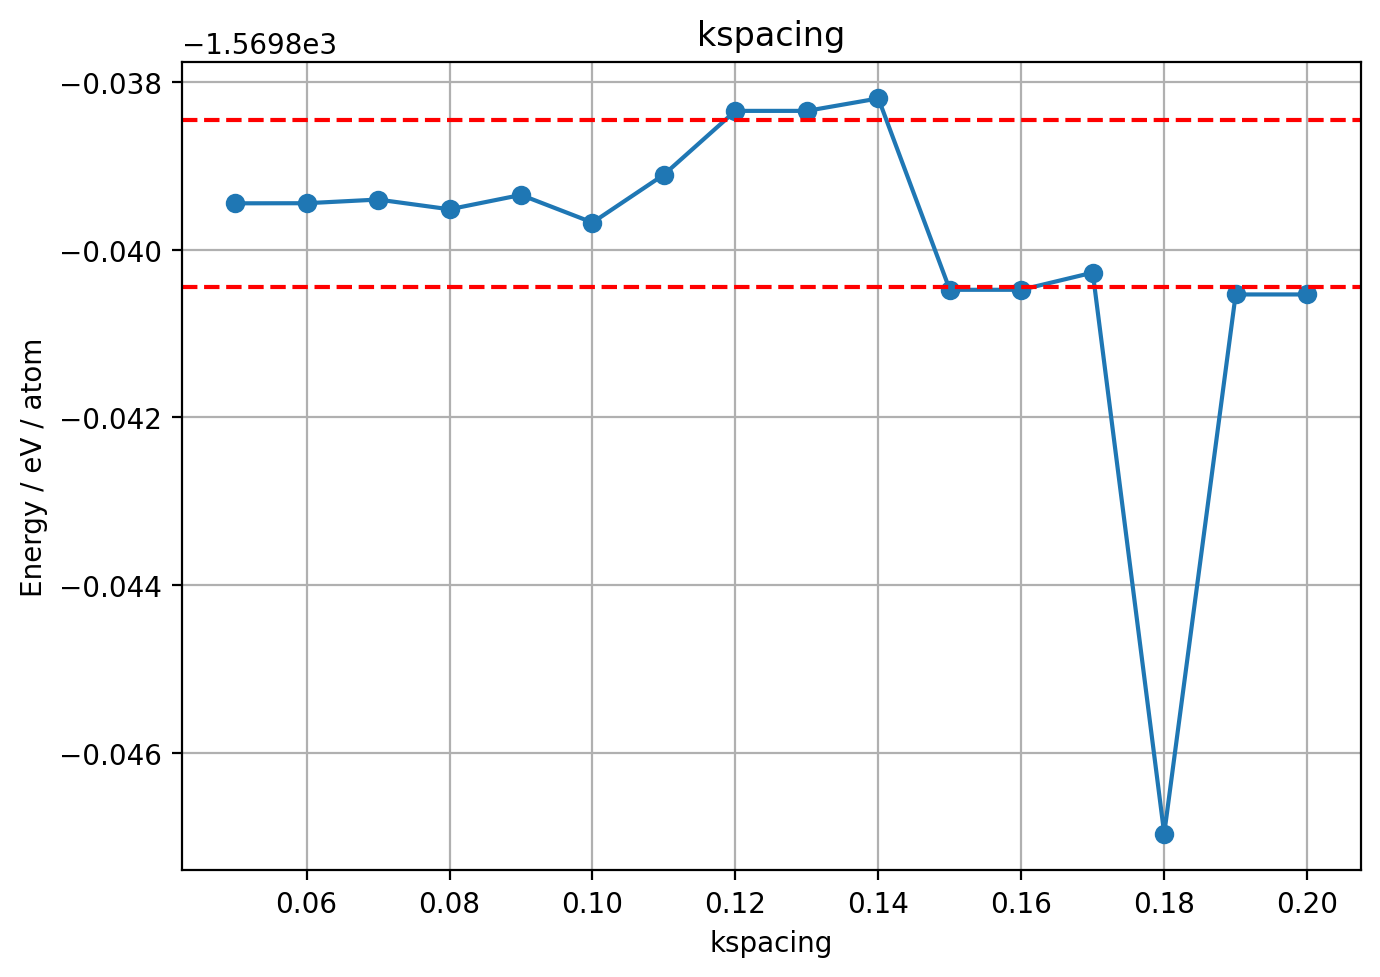

In [1]:
from convergence_test import ABACUSConvergenceTest
%config InlineBackend.figure_format = 'retina'

conv_test = ABACUSConvergenceTest(abacus_prefix="OMP_NUM_THREADS=16")
conv_test.kpoint_run(kspacing_min=0.05, kspacing_max=0.20, kspacing_interval=0.01, target_dir="vacancy/cell-relax_Ti")
conv_test.kpoint_postprocessing()
conv_test.kpoint_generate_plot(n_atoms=2)

3. cell-relax

In [ ]:
! source $HOME/Software/abacus-develop/toolchain/abacus_env.sh && cd vacancy/cell-relax_Ti && OMP_NUM_THREADS=16 abacus > abacus.log

In [2]:
! grep "FINAL_ETOT_IS" vacancy/cell-relax_Ti/OUT.ABACUS/running_cell-relax.log | tail -n 1

 !FINAL_ETOT_IS -3139.6795479767506549 eV


> Cell Relax (fcc-Al)

1. 生成STRU文件

In [1]:
from pathlib import Path
from ase.io import read, write
from ase.visualize import view

cs_dir = "./vacancy/cell-relax_Al"
cs_vasp = Path(cs_dir, "Al.cif")
cs_atoms = read(cs_vasp, format="cif")
cs_stru = Path(cs_dir, "STRU")
pp = {"Al": "Al.upf"}
basis = {"Al": "Al_gga_8au_100Ry_2s2p1d.orb"}
write(cs_stru, cs_atoms, format="abacus", pp=pp, basis=basis)

2. K点收敛性测试


Starting kspacing test from 0.03 to 0.2 1/Bohr with interval 0.01 1/Bohr
Using the existing 'kpointtest_dir'

Testing kspacing (18 points)
-> Skipping kspacing = 0.03 1/Bohr (already computed)
-> Skipping kspacing = 0.04 1/Bohr (already computed)
-> Skipping kspacing = 0.05 1/Bohr (already computed)
-> Skipping kspacing = 0.06 1/Bohr (already computed)
-> Skipping kspacing = 0.07 1/Bohr (already computed)
-> Skipping kspacing = 0.08 1/Bohr (already computed)
-> Skipping kspacing = 0.09 1/Bohr (already computed)
-> Skipping kspacing = 0.1 1/Bohr (already computed)
-> Skipping kspacing = 0.11 1/Bohr (already computed)
-> Skipping kspacing = 0.12 1/Bohr (already computed)
-> Skipping kspacing = 0.13 1/Bohr (already computed)
-> Skipping kspacing = 0.14 1/Bohr (already computed)
-> Skipping kspacing = 0.15 1/Bohr (already computed)
-> Skipping kspacing = 0.16 1/Bohr (already computed)
-> Skipping kspacing = 0.17 1/Bohr (already computed)
-> Skipping kspacing = 0.18 1/Bohr (already compute

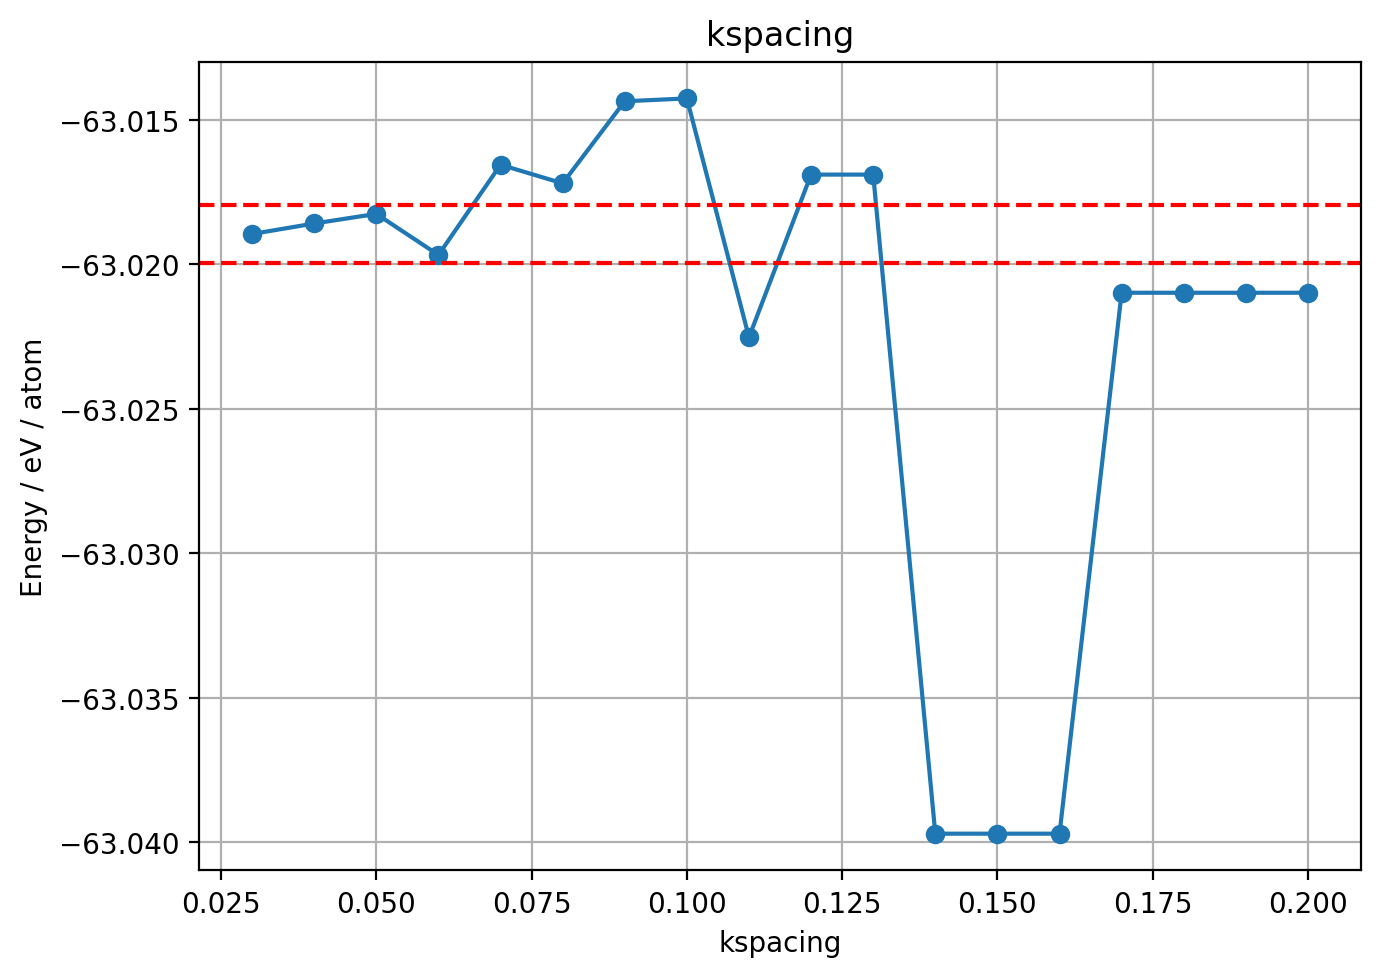

In [2]:
from convergence_test import ABACUSConvergenceTest
%config InlineBackend.figure_format = 'retina'

conv_test = ABACUSConvergenceTest(abacus_prefix="OMP_NUM_THREADS=16")
conv_test.kpoint_run(kspacing_min=0.03, kspacing_max=0.20, kspacing_interval=0.01, target_dir="vacancy/cell-relax_Al")
conv_test.kpoint_postprocessing()
conv_test.kpoint_generate_plot(n_atoms=4)

3. cell-relax

In [ ]:
! source $HOME/Software/abacus-develop/toolchain/abacus_env.sh && cd vacancy/cell-relax_Ti && OMP_NUM_THREADS=16 abacus > abacus.log

In [ ]:
! grep "FINAL_ETOT_IS" vacancy/cell-relax_Ti/OUT.ABACUS/running_cell-relax.log | tail -n 1

> Cell Relax (carbon-C)

1. 生成STRU文件

In [ ]:
from pathlib import Path
from ase.io import read, write
from ase.visualize import view

cs_dir = "./vacancy/cell-relax_C"
cs_vasp = Path(cs_dir, "C.cif")
cs_atoms = read(cs_vasp, format="cif")
cs_stru = Path(cs_dir, "STRU")
pp = {"Ti": "Ti_ONCV_PBE-1.2.upf", "Al": "Al.upf", "C": "C.upf"}
basis = {"Ti": "Ti_gga_7au_100Ry_4s2p2d1f.orb", "Al": "Al_gga_8au_100Ry_2s2p1d.orb", "C": "C_gga_8au_100Ry_2s2p1d.orb"}
write(cs_stru, cs_atoms, format="abacus", pp=pp, basis=basis)

2. K点收敛性测试

In [ ]:
from convergence_test import ABACUSConvergenceTest
%config InlineBackend.figure_format = 'retina'

conv_test = ABACUSConvergenceTest(abacus_prefix="OMP_NUM_THREADS=16")
conv_test.kpoint_run(kspacing_min=0.05, kspacing_max=0.20, kspacing_interval=0.01, target_dir="vacancy/cell-relax_Al")
conv_test.kpoint_postprocessing()
conv_test.kpoint_generate_plot(n_atoms=4)

3. cell-relax

In [ ]:
! source $HOME/Software/abacus-develop/toolchain/abacus_env.sh && cd vacancy/cell-relax_Ti && OMP_NUM_THREADS=16 abacus > abacus.log

In [ ]:
! grep "FINAL_ETOT_IS" vacancy/cell-relax_Ti/OUT.ABACUS/running_cell-relax.log | tail -n 1